In [17]:
import geopandas as gpd
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
engine = create_engine(   
"mssql+pyodbc:///?odbc_connect="
"Driver%3D%7BODBC+Driver+17+for+SQL+Server%7D%3B"
"Server%3Drliddb.int.lcog.org%2C5433%3B"
"Database%3DRLIDGeo%3B"
"Trusted_Connection%3Dyes%3B"
"ApplicationIntent%3DReadWrite%3B"
"WSID%3Dclwrk4087.int.lcog.org%3B")

In [9]:
sql = '''
SELECT 
label_full AS name,
longitude,
latitude,
Shape.STAsBinary() AS geom
FROM dbo.Facility
WHERE type_full = 'LTD Transit Sta';
'''

In [10]:
stations = gpd.GeoDataFrame.from_postgis(sql, engine, geom_col='geom')

In [13]:
stations.crs = "EPSG:2914"

In [14]:
stations = stations.to_crs(epsg=3857)

In [15]:
outpath = r'T:\MPO\RTP\FY20 2045 Update\Data and Resources\Data\ForAppendixF\RTP'

In [16]:
stations.to_file(os.path.join(outpath, "stations.shp"))

In [18]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

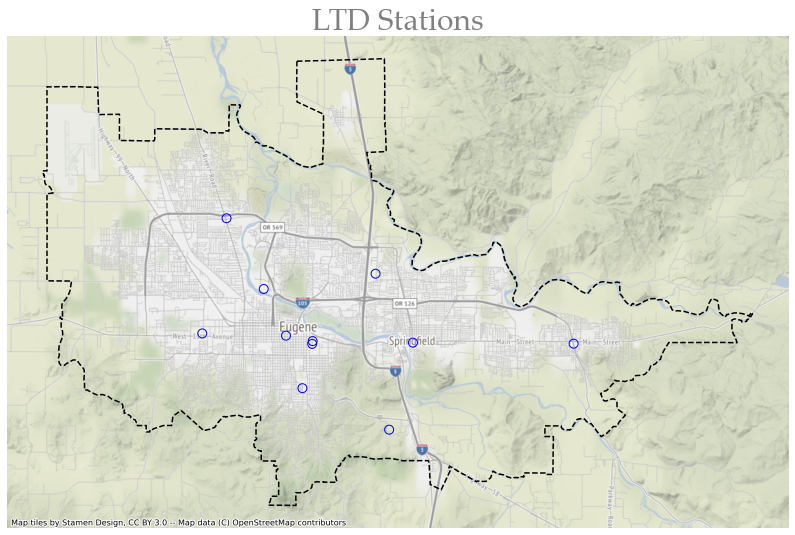

In [20]:
fig, ax = plt.subplots(figsize=(14, 12))
stations.plot(ax=ax, marker ='o', facecolor="none", edgecolor="blue", markersize=80, aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("LTD Stations", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");